### Module 12: Machine Learning

The first two questions involve the following dataset, which has two positive points (purple squares) and two negative points (green circles).

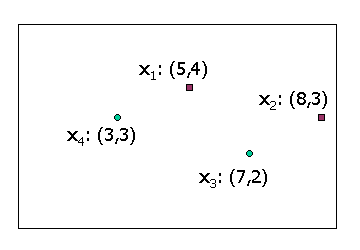

In [1]:
from IPython.display import Image
Image(filename='svm.png')

That is, the training data set consists of:
- (x1,y1) = ((5,4),+1)
- (x2,y2) = ((8,3),+1)
- (x3,y3) = ((7,2),-1)
- (x4,y4) = ((3,3),-1)

This data set is separable. If we call the horizontal axis of the space u and the vertical axis v, then a form of the decision boundary is v=c+au. Note that in this form, c is the intersection of the boundary with the vertical (v) axis, and a is the slope.

In all cases, if (u,v) is one of the points x1 or x2, then the point will be above the boundary (that is, if x1 = (u,v), then v >= c+au, and similarly for x2). Likewise, x3 and x4 must be below the boundary.

Various values of a and c could be chosen, but there are significant constraints on what a and c can be. Deduce those constraints.

In [14]:
from fractions import Fraction

points = [(5, 4,  1),
          (8, 3,  1),
          (3, 3, -1),
          (7, 2, -1)]

possible_values = [(6, -1/3),
                   (6, -3/5),
                   (4, -1/9),
                   (5, -2/5)]

for c, a in possible_values:
    is_possible = True
    for u, v, result in points:
        boundary = c + a * u
        if v >= boundary and result != 1:
            is_possible = False
        elif v < boundary and result != -1:
            is_possible = False
    if is_possible:
        print('c: {}, a: {}'.format(c, Fraction(a).limit_denominator()))

c: 5, a: -2/5


Our goal is to find the maximum-margin linear classifier for this data. In easy cases, the shortest line between a positive and negative point has a perpendicular bisector that separates the points. If so, the perpendicular bisector is surely the maximum-margin separator. Alas, in this case, the closest pair of positive and negative points, x2 and x3, have a perpendicular bisector that misclassifies x1 as negative, so that won't work.

The next-best possibility is that we can find a pair of points on one side (i.e., either two positive or two negative points) such that a line parallel to the line through these points is the maximum-margin separator. In these cases, the limit to how far from the two points the parallel line can get is determined by the closest (to the line between the two points) of the points on the other side. For our simple data set, this situation holds.

Consider all possibilities for boundaries of this type, and express the boundary as w.x+b=0, such that w.x+b>=1 for positive points x and w.x+b<=-1 for negative points x. Assume that w = (w1,w2).

In [61]:
import math
import numpy as np

positive_points = np.array([[5, 4],
                           [8, 3]])

negative_points = np.array([[3, 3],
                           [7, 2]])

def distance_to_line(a, b, p):
    """The line spans the points a and b."""
    vec_pb = np.array(b - p)
    vec_ab = np.array(b - a)
    # scalar projection of u onto v is u @ v / v @ v
    scalar_proj = (vec_pb @ vec_ab) / (vec_ab @ vec_ab)
    # make use of Pythagoras's theorem, since the shortest distance
    # is the magnitude of the line orthogonal to the line spanned
    # by the points a and b.
    proj_len = np.linalg.norm(scalar_proj)
    pb_len = np.linalg.norm(p-b)
    return math.sqrt(pb_len - proj_len)

def closest_point(points, a, b):
    """The line spans the points a and b."""
    min_dist = None
    closest = None
    for point in points:
        dist = distance_to_line(a, b, point)
        if min_dist is None or dist < min_dist:
            min_dist = dist
            closest = point
    return closest

# v = (-1/3) * u + 17/3
positive_grad, positive_intercept = np.polyfit(
    [pt[0] for pt in positive_points],
    [pt[1] for pt in positive_points],
    deg=1,
)
closest_x1_x2 = closest_point(negative_points, *positive_points)
# x3: (7, 2) is the negative point closest to the line x1 - x2
# v = (-1/3) * u + 13/3
intercept_1 = 2 + (1/3) * 7
# average the intercepts to get the parallel line between these 2 lines
# the intercept of the parallel line turns out to be 5
parallel_intercept_1 = np.mean([positive_intercept, intercept_1])
# therefore the equation of the parallel line is:
# v = (-1/3) * u + 5 
w_positive = [1/3, 1]
b_positive = -5
# w @ x + b >= 1 for the positive points
scaling_factor = 1 / (w_positive @ positive_points[0] + b_positive)
w_positive *= np.array(scaling_factor)

# # v = (-1/4) * u + 15/4
negative_grad, negative_intercept = np.polyfit(
    [pt[0] for pt in negative_points],
    [pt[1] for pt in negative_points],
    deg=1,
)
closest_x3_x4 = closest_point(positive_points, *negative_points)
# x2: (8, 3) is the positive point closest to the line x3 - x4
# parallel line: v = (-1/4) * u + 5
intercept_2 = 3 + (1/4) * 8
# average the intercepts to get the parallel line between these 2 lines
# the intercept of the parallel line turns out to be 35/8
parallel_intercept_2 = np.mean([negative_intercept, intercept_2])
# therefore the equation of the parallel line is:
# v = (-1/4) * u + 35/8 
w_negative = [1/4, 1]
b_negative = -35/8
# w @ x + b >= 1 for the positive points
scaling_factor = 1 / (w_negative @ negative_points[0] + b_negative)
w_negative *= np.array(scaling_factor)

# there are 2 candidate lines for the max-margin separator:
# v = (-1/3) * u + 13/3
# v = (-1/4) * u + 5
# the correct one is the one with the smaller length of w
print('Length of w_positive: {:.2}'.format(w_positive @ w_positive))
print('Length of w_negative: {:.2}'.format(w_negative @ w_negative))
print('w1 = {:.2}, w2 = {:.2}, b = {}'.format(*w_positive, b_positive))

Length of w_positive: 2.5
Length of w_negative: 2.7
w1 = 0.5, w2 = 1.5, b = -5


Below we see a set of 20 points and a decision tree for classifying the points.

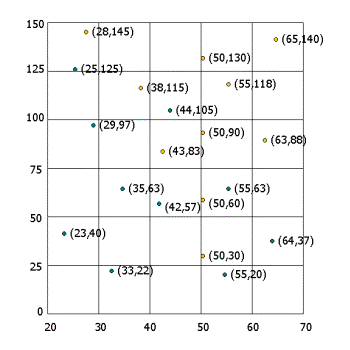

In [2]:
Image(filename='grid.png')

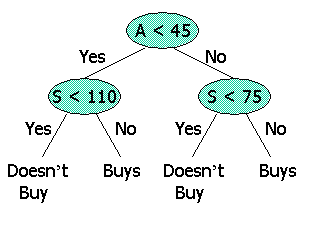

In [3]:
Image(filename='tree.png')

To be precise, the 20 points represent (Age,Salary) pairs of people who do or do not buy gold jewelry. Age (abbreviated A in the decision tree) is the x-axis, and Salary (S in the tree) is the y-axis. Those that do are represented by gold points, and those that do not by green points. The 10 points of gold-jewelry buyers are:
(28,145), (38,115), (43,83), (50,130), (50,90), (50,60), (50,30), (55,118), (63,88), and (65,140).

The 10 points of those that do not buy gold jewelry are:
(23,40), (25,125), (29,97), (33,22), (35,63), (42,57), (44, 105), (55,63), (55,20), and (64,37).

Some of these points are correctly classified by the decision tree and some are not. Determine the classification of each point

In [7]:
buyers = [(28, 145),
          (38, 115),
          (43,  83),
          (50, 130),
          (50,  90),
          (50,  60),
          (50,  30),
          (55, 118),
          (63,  88),
          (65, 140)]

non_buyers = [(23,  40),
              (25, 125),
              (29,  97),
              (33,  22),
              (35,  63),
              (42,  57),
              (44, 105),
              (55,  63),
              (55,  20),
              (64,  37)]

def is_buyer(point):
    age, salary = point
    if age < 45:
        if salary < 110:
            return False
        return True
    else:
        if salary < 75:
            return False
        return True
    
for buyer in buyers:
    if not is_buyer(buyer):
        print('Person {} is actually not a buyer.'.format(buyer))
for non_buyer in non_buyers:
    if is_buyer(non_buyer):
        print('Person　{} is actually a buyer'.format(non_buyer))

Person (43, 83) is actually not a buyer.
Person (50, 60) is actually not a buyer.
Person (50, 30) is actually not a buyer.
Person　(25, 125) is actually a buyer


Consider the process of building a binary classifier based on a decision-tree model using the Gini Index as a measure of impurity associated with a tree node that represents a subset of training examples. A node is split into partitions represented by its child nodes based on the values of a selected attribute. The goodness of the attribute for the split, referred to as gain of the attribute, is estimated in terms of the difference between the impurity of the parent node and the weighted sum of the impurities of the child nodes.

Consider the training set of examples described in terms of three attributes A1, A2 and A3 in addition to the decision attribute, Class Label.

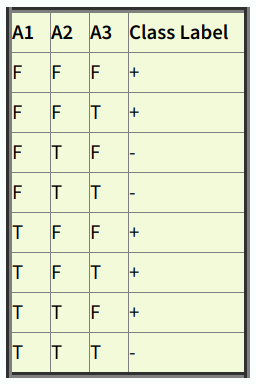

In [6]:
Image(filename='examples.png')

The first three columns of the table represent the values of the three binary attributes and the last column indicates whether the element (described by the row) is a positive example of the class or not (+ indicates a positive example). The classifier aims at classifying the training examples into positive or negative examples of the class under consideration.

Estimate the goodness of the attributes for splitting the training set given in the table.

In [43]:
import math

examples = [(False, False, False, 1),
            (False, False,  True, 1),
            (False,  True, False, 0),
            (False,  True,  True, 0),
            ( True, False, False, 1),
            ( True, False,  True, 1),
            ( True,  True, False, 1),
            ( True,  True,  True, 0)]

def calc_entropy(examples):
    entropy = 0
    distinct_values = set(examples)
    for val in distinct_values:
        p = sum([1 for ex in examples if ex == val]) / len(examples)
        log_p = math.log(p)
        entropy += p * log_p
    return -entropy
        
entropy_result = calc_entropy([ex[3] for ex in examples])
for i in range(0, 3):
    cond_entropy = sum([
        0.5 * calc_entropy([ex[i] for ex in examples if ex[3] == 1]),
        0.5 * calc_entropy([ex[i] for ex in examples if ex[3] == 0])
    ])
    info_gain = entropy_result - cond_entropy
    print('Information gain for A{}: {}'.format(i + 1, info_gain))

Information gain for A1: 0.006800320505947477
Information gain for A2: 0.4113620263888882
Information gain for A3: 0.006800320505947477


Suppose our training set consists of the three negative points (1,4), (3,3), and (3,1) and the two positive points (3,6) and (5,3). If we use nearest-neighbor learning, where we classify a point to be in the class of the nearest member of the training set, what is the boundary between the positive and negative points?

In [15]:
import numpy as np

TRAINING_SET = {
    (1, 4): 0,
    (3, 3): 0,
    (3, 1): 0,
    (3, 6): 1,
    (5, 3): 1,
}

TEST_POINTS = [(3.6, 4.1),
               (3.9, 4.1),
               (2.3, 4.7),
               (2.7, 4.6)]

def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def classify_point(point):
    min_dist = None
    closest = None
    for example in TRAINING_SET.keys():
        dist = distance(example, point)
        if min_dist is None or dist < min_dist:
            min_dist = dist
            closest = example
    return TRAINING_SET[closest]

for point in TEST_POINTS:
    classification = 'positive' if classify_point(point) == 1 else 'negative'
    print('Point {} is classified as {}'.format(point, classification))

Point (3.6, 4.1) is classified as negative
Point (3.9, 4.1) is classified as negative
Point (2.3, 4.7) is classified as negative
Point (2.7, 4.6) is classified as positive
